In [2]:
#%matplotlib notebook
from fipy import CellVariable, Grid2D, Viewer, TransientTerm, DiffusionTerm
from scipy.special import erf # doctest: +SCIPY>
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive,widgets,Layout


## Solucion numerica del problema de difusión
### Conducción no estacionaria en tranferencia de calor

$$\frac{\partial T}{\partial t} = D \nabla^2 T.$$

#### Caso 3: conducción en 2D

In [3]:
nx = 20

ny = nx

dx = 1.

dy = dx

L = dx * nx

mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)

In [4]:
phi = CellVariable(name = "solution variable",

                   mesh = mesh,

                   value = 0.)

In [5]:
D = 1.

eq = TransientTerm() == DiffusionTerm(coeff=D)

In [6]:
valueTopLeft = 0

valueBottomRight = 1

In [7]:
X, Y = mesh.faceCenters

facesTopLeft = ((mesh.facesLeft & (Y > L / 2))

                | (mesh.facesTop & (X < L / 2)))

facesBottomRight = ((mesh.facesRight & (Y < L / 2))

                    | (mesh.facesBottom & (X > L / 2)))



facesTop = (mesh.facesTop & (Y > L/2 ))

facesLeft = (mesh.facesLeft & (X < L / 2))

facesBottom = (mesh.facesBottom & (Y < L / 2))

facesRight =  (mesh.facesRight & (X > L / 2))

In [8]:
T1 = 40
T0 = 0
phi.constrain(T1, facesTop)

phi.constrain(T0, facesBottom)

phi.constrain(T0, facesRight)

phi.constrain(T0, facesLeft)



In [47]:
delta_tiempo =  0.9 * dx**2 / (2 * D)
#Fourier = t * a / Lx
t_final = 2*L/D
pasos = np.int( t_final/delta_tiempo)+1
tiempo = np.arange(0,t_final,delta_tiempo)

temperaturas = np.tile(np.zeros_like(phi.value),(pasos,1))

phi.setValue(0)

for i, tiempo_i in enumerate(tiempo):
    temperaturas[i] = phi.value
    eq.solve(var=phi, dt=delta_tiempo)
    


In [48]:
#fig0,ax0 = plt.subplots()
#i = np.abs(tiempo-t_final/2).argmin()
#temperatura_i = temperaturas[i].reshape(nx,ny)

#x = mesh.x.value.reshape(nx,ny)
#y = mesh.y.value.reshape(nx,ny)
#cf1 = ax0.contourf(x,y,temperatura_i);
#fig0.colorbar(cf1,label='T');

In [50]:
niveles= np.linspace(T0,T1,20)
def presenta_campo(ti):
    #fig1,ax1 = plt.subplots()
    i = np.int(ti/delta_tiempo)
    #i = np.abs(tiempo-t_final/2).argmin()
    
    tiempo_i = delta_tiempo*i
    temperatura_i = temperaturas[i].reshape(nx,ny)
    x = mesh.x.value.reshape(nx,ny)
    y = mesh.y.value.reshape(nx,ny)
    plt.contourf(x,y,temperatura_i,levels=niveles);
    plt.colorbar()
    print(i)

interact(presenta_campo,ti=widgets.FloatSlider(min=0,max=t_final,step=delta_tiempo*5,value=0,description='Tiempo [s]'));

interactive(children=(FloatSlider(value=0.0, description='Tiempo [s]', max=40.0, step=2.25), Output()), _dom_c…

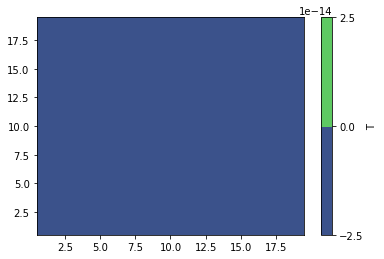

interactive(children=(FloatSlider(value=0.0, description='Tiempo [s]', max=4.0, step=0.45), Output()), _dom_cl…

In [34]:
fig0,ax0 = plt.subplots()
temperatura_i = temperaturas[0].reshape(nx,ny)
x = mesh.x.value.reshape(nx,ny)
y = mesh.y.value.reshape(nx,ny)
cf1 = ax0.contourf(x,y,temperatura_i);
fig0.colorbar(cf1,label='T');
def presenta_campo_T(ti):
    #fig1,ax1 = plt.subplots()
    i = np.int(ti/delta_tiempo)
    #i = np.abs(tiempo-t_final/2).argmin()
    tiempo_i = delta_tiempo*i
    temperatura_i = temperaturas[i].reshape(nx,ny)
    x = mesh.x.value.reshape(nx,ny)
    y = mesh.y.value.reshape(nx,ny)
    #cf1 = ax0.contourf(x,y,temperatura_i);
    cf1.set_array(temperatura_i)
    fig0.canvas.draw_idle()
    #plt.show()
interact(presenta_campo_T,ti=widgets.FloatSlider(min=0,max=t_final,step=delta_tiempo,value=0,description='Tiempo [s]'));   